**This notebook is an exercise in the [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/target-encoding).**

---


# Introduction #

In this exercise, you'll apply target encoding to features in the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset.

Run this cell to set everything up!

In [1]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex6 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from category_encoders import MEstimateEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


df = pd.read_csv("../input/fe-course-data/ames.csv")

/tmp/ipykernel_36/3788892820.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


-------------------------------------------------------------------------------

First you'll need to choose which features you want to apply a target encoding to. Categorical features with a large number of categories are often good candidates. Run this cell to see how many categories each categorical feature in the *Ames* dataset has.

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


In [3]:
df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
count,2930,2930,2930.000000,2930.000000,2930,2930,2930,2930,2930,2930,...,2930.000000,2930,2930,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,16,7,NaN,NaN,2,3,4,4,3,5,...,NaN,5,5,5,NaN,NaN,NaN,10,6,NaN
top,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,NaN,NaN,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,NaN,No_Pool,No_Fence,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,1079,2273,NaN,NaN,2918,2732,1859,2633,2927,2140,...,NaN,2917,2358,95,NaN,NaN,NaN,2536,2413,NaN
mean,NaN,NaN,57.647782,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,NaN,NaN,33.499441,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,NaN,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,NaN,NaN,43.000000,7440.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,NaN,NaN,63.000000,9436.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,NaN,NaN,78.000000,11555.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [ ]:
df.select_dtypes(["object"]).nunique()

We talked about how the M-estimate encoding uses smoothing to improve estimates for rare categories. To see how many times a category occurs in the dataset, you can use the `value_counts` method. This cell shows the counts for `SaleType`, but you might want to consider others as well.

In [5]:
df["SaleType"].value_counts()

SaleType
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

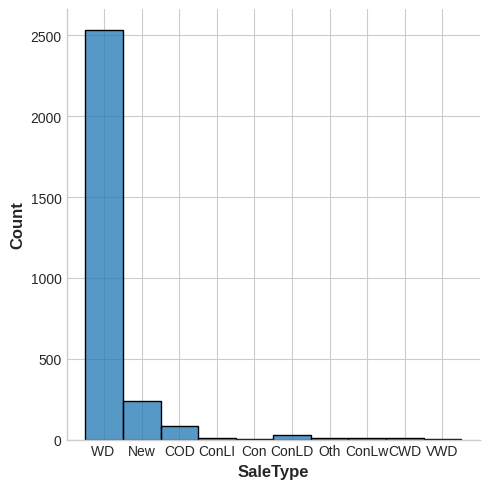

In [6]:
sns.displot(df["SaleType"])

# 1) Choose Features for Encoding

Which features did you identify for target encoding? After you've thought about your answer, run the next cell for some discussion.

In [7]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

 The `Neighborhood` feature looks promising. It has the most categories of any feature, and several categories are rare. Others that could be worth considering are `SaleType`, `MSSubClass`, `Exterior1st`, `Exterior2nd`. In fact, almost any of the nominal features would be worth trying because of the prevalence of rare categories.

In [12]:
df['Neighborhood'].value_counts()

Neighborhood
North_Ames                                 443
College_Creek                              267
Old_Town                                   239
Edwards                                    194
Somerset                                   182
Northridge_Heights                         166
Gilbert                                    165
Sawyer                                     151
Northwest_Ames                             131
Sawyer_West                                125
Mitchell                                   114
Brookside                                  108
Crawford                                   103
Iowa_DOT_and_Rail_Road                      93
Timberland                                  72
Northridge                                  71
Stone_Brook                                 51
South_and_West_of_Iowa_State_University     48
Clear_Creek                                 44
Meadow_Village                              37
Briardale                                   30


In [31]:
#for x in df.columns:
#print(f'{x}: {sorted(df[x].unique().tolist())}')

In [32]:
# Membuat dictionary untuk menyimpan jumlah unique values per kolom
unique_counts = {col: len(df[col].unique()) for col in df.columns}

# Mengurutkan dan mencetak hasil
for col, count in sorted(unique_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'{col}: {count}')

LotArea: 1960
GrLivArea: 1292
BsmtUnfSF: 1137
FirstFlrSF: 1083
TotalBsmtSF: 1058
SalePrice: 1032
SecondFlrSF: 635
GarageArea: 603
MasVnrArea: 445
WoodDeckSF: 380
BsmtFinSF2: 274
OpenPorchSF: 252
EnclosedPorch: 183
LotFrontage: 129
ScreenPorch: 121
YearBuilt: 118
YearRemodAdd: 61
MiscVal: 38
LowQualFinSF: 36
Threeseasonporch: 31
Neighborhood: 28
Exterior2nd: 17
MSSubClass: 16
Exterior1st: 16
TotRmsAbvGrd: 14
PoolArea: 14
MoSold: 12
OverallQual: 10
SaleType: 10
Condition1: 9
OverallCond: 9
Condition2: 8
HouseStyle: 8
RoofMatl: 8
BsmtFinSF1: 8
BedroomAbvGr: 8
Functional: 8
MSZoning: 7
BsmtFinType1: 7
BsmtFinType2: 7
GarageType: 7
RoofStyle: 6
Foundation: 6
BsmtQual: 6
BsmtCond: 6
Heating: 6
Electrical: 6
FireplaceQu: 6
GarageCars: 6
GarageQual: 6
GarageCond: 6
MiscFeature: 6
SaleCondition: 6
LotConfig: 5
BldgType: 5
MasVnrType: 5
ExterCond: 5
BsmtExposure: 5
HeatingQC: 5
FullBath: 5
KitchenQual: 5
Fireplaces: 5
PoolQC: 5
Fence: 5
YearSold: 5
LotShape: 4
LandContour: 4
ExterQual: 4
BsmtFul

-------------------------------------------------------------------------------

Now you'll apply a target encoding to your choice of feature. As we discussed in the tutorial, to avoid overfitting, we need to fit the encoder on data heldout from the training set. Run this cell to create the encoding and training splits:

In [33]:
# Encoding split
X_encode = df.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop("SalePrice")

# Training split
X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop("SalePrice")

In [34]:
y_train

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2924    131000
2925    142500
2926    131000
2927    132000
2929    188000
Name: SalePrice, Length: 2344, dtype: int64

In [36]:
y_encode

2216    220000
836     143000
2396    281000
1962    135000
305     102776
         ...  
2352    172000
2027    136000
867     198500
2590    167000
1418    262280
Name: SalePrice, Length: 586, dtype: int64

# 2) Apply M-Estimate Encoding

Apply a target encoding to your choice of categorical features. Also choose a value for the smoothing parameter `m` (any value is okay for a correct answer).

In [40]:
# YOUR CODE HERE: Create the MEstimateEncoder
# Choose a set of features to encode and a value for m
encoder = MEstimateEncoder(cols='Neighborhood', m=0.5)


# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)


# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [41]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,120.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,160.0,20000.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,0.0,No_Pool,No_Fence,NaN,0.0,9,2006,WD,Abnorml
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,0.0,No_Pool,Good_Privacy,NaN,0.0,3,2006,WD,Normal
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2006,WD,Normal
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal


In [39]:
# Lines below will give you a hint or solution code
q_2.hint()
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Your code should look something like:
```python
encoder = MEstimateEncoder(
    cols=____,
    m=____,
)


# Fit the encoder on the encoding split
____.____(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)
```


<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

encoder = MEstimateEncoder(
    cols=["Neighborhood"],
    m=1.0,
)


# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)

```

If you'd like to see how the encoded feature compares to the target, you can run this cell:

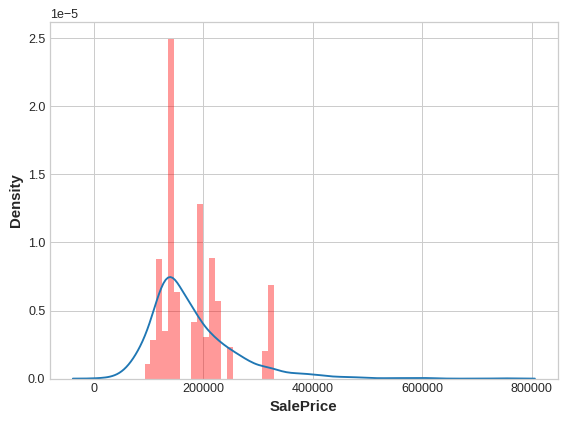

In [42]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

From the distribution plots, does it seem like the encoding is informative?

And this cell will show you the score of the encoded set compared to the original set:

In [43]:
X = df.copy()
y = X.pop("SalePrice")
score_base = score_dataset(X, y)
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")

Baseline Score: 0.1434 RMSLE
Score with Encoding: 0.1421 RMSLE


Do you think that target encoding was worthwhile in this case? Depending on which feature or features you chose, you may have ended up with a score significantly worse than the baseline. In that case, it's likely the extra information gained by the encoding couldn't make up for the loss of data used for the encoding.

-------------------------------------------------------------------------------

In this question, you'll explore the problem of overfitting with target encodings. This will illustrate this importance of training fitting target encoders on data held-out from the training set.

So let's see what happens when we fit the encoder and the model on the *same* dataset. To emphasize how dramatic the overfitting can be, we'll mean-encode a feature that should have no relationship with `SalePrice`, a count: `0, 1, 2, 3, 4, 5, ...`.

In [49]:
# Try experimenting with the smoothing parameter m
# Try 0, 1, 5, 50
m = 50

X = df.copy()
y = X.pop('SalePrice')

# Create an uninformative feature
X["Count"] = range(len(X))
X["Count"][1] = 0  # actually need one duplicate value to circumvent error-checking in MEstimateEncoder

# fit and transform on the same dataset
encoder = MEstimateEncoder(cols="Count", m=m)
X = encoder.fit_transform(X, y)

# Results
score =  score_dataset(X, y)
print(f"Score: {score:.4f} RMSLE")

Score: 0.0362 RMSLE


Almost a perfect score!

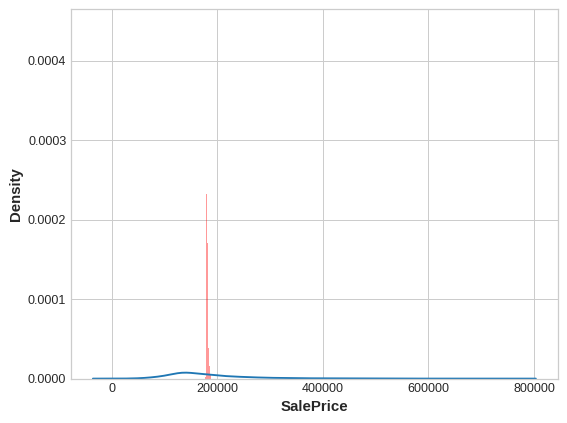

In [52]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=True, hist=False)
ax = sns.distplot(X["Count"], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

And the distributions are almost exactly the same, too.

# 3) Overfitting with Target Encoders

Based on your understanding of how mean-encoding works, can you explain how XGBoost was able to get an almost a perfect fit after mean-encoding the count feature?

In [54]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


Since `Count` never has any duplicate values, the mean-encoded `Count` is essentially an exact copy of the target. In other words, mean-encoding turned a completely meaningless feature into a perfect feature.

Now, the only reason this worked is because we trained XGBoost on the same set we used to train the encoder. If we had used a hold-out set instead, none of this "fake" encoding would have transferred to the training data.

The lesson is that when using a target encoder it's very important to use separate data sets for training the encoder and training the model. Otherwise the results can be very disappointing!


In [55]:
# Uncomment this if you'd like a hint before seeing the answer
q_3.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> 
Suppose you had a dataset like:

| Count | Target |
|-------|--------|
| 0     | 10     |
| 1     | 5      |
| 2     | 30     |
| 3     | 22     |

What is the mean value of Target when Count is equal to 0? It's 10, since 0 only occurs in the first row. So what would be the result of mean-encoding Count, knowing that Count never has any duplicate values?


# The End #

That's it for *Feature Engineering*! We hope you enjoyed your time with us.

Now, are you ready to try out your new skills? Now would be a great time to join our [Housing Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) Getting Started competition. We've even prepared a [Bonus Lesson](https://www.kaggle.com/ryanholbrook/feature-engineering-for-house-prices) that collects all the work we've done together into a starter notebook.

# References #
Here are some great resources you might like to consult for more information. They all played a part in shaping this course:
- *The Art of Feature Engineering*, a book by Pablo Duboue.
- *An Empirical Analysis of Feature Engineering for Predictive Modeling*, an article by Jeff Heaton.
- *Feature Engineering for Machine Learning*, a book by Alice Zheng and Amanda Casari. The tutorial on clustering was inspired by this excellent book.
- *Feature Engineering and Selection*, a book by Max Kuhn and Kjell Johnson.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*